In [3]:
import gevfit
import analysis
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from sklearn.utils import resample
import csv
attawayData = pd.read_csv("Results/AttawayData.csv")

### Plots all of the Total Runtimes as a Function of Number of Ranks

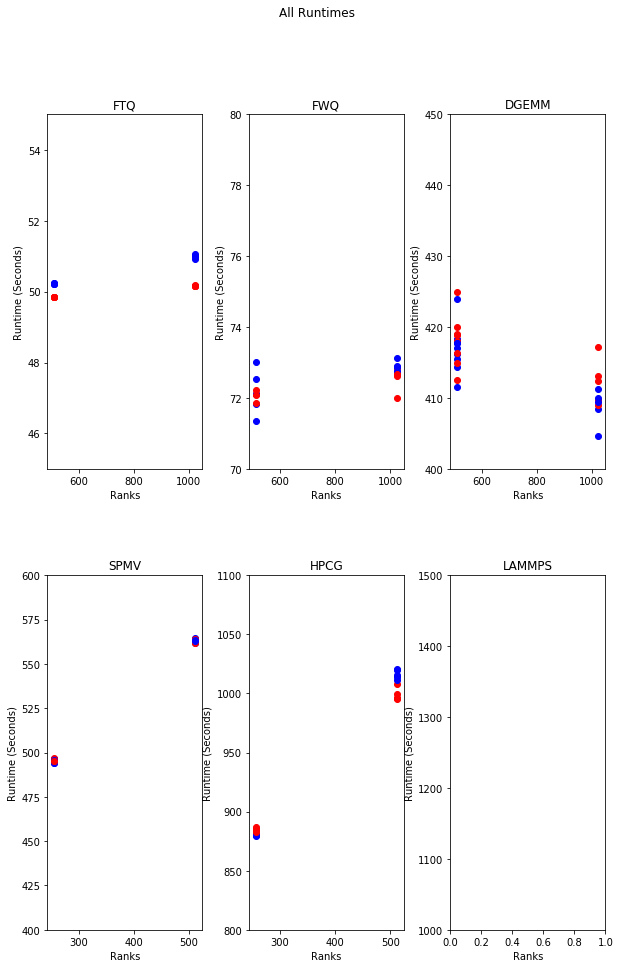

In [2]:
attawayData = pd.read_csv("Results/AttawayData.csv")

fig, axs = plt.subplots(2, 3, figsize=(10,15))
fig.suptitle('All Runtimes')
plt.subplots_adjust(wspace = .3,hspace =.3)


MILLION = 1000000
yMin = 0
yMax = 0
count = 0

for run in range(0, len(attawayData)):
    label = ''
    workload = attawayData['Workload'][run]
    ranks = attawayData['Ranks'][run]
    stencil = attawayData['Stencil'][run]

    currentRunTime = attawayData['RunTime'][run]
   
    if int(stencil) > 0:
        label = label + 'Stencil'
        
    if label == '':
        if (workload == 'sleep'):
            axs[0][0].plot(int(ranks), currentRunTime, 'o', color='red'),
        elif (workload == 'fwq'):
            axs[0][1].plot(int(ranks), currentRunTime, 'o', color='red'),
        elif (workload == 'dgemm'):
            axs[0][2].plot(int(ranks), currentRunTime, 'o', color='red'),
        elif (workload == 'spmv'):   
            axs[1][0].plot(int(ranks), currentRunTime, 'o', color='red'),
        elif (workload == 'hpcg'):    
            axs[1][1].plot(int(ranks), currentRunTime, 'o', color='red'),
        elif (workload == 'lammps'):       
            axs[1][2].plot(int(ranks), currentRunTime, 'o', color='red')

    elif label == 'Stencil':
        if (workload == 'sleep'):
            axs[0][0].plot(int(ranks), currentRunTime, 'o', color='blue'),
        elif (workload == 'fwq'):
            axs[0][1].plot(int(ranks), currentRunTime, 'o', color='blue'),
        elif (workload == 'dgemm'):
            axs[0][2].plot(int(ranks), currentRunTime, 'o', color='blue'),
        elif (workload == 'spmv'):   
            axs[1][0].plot(int(ranks), currentRunTime, 'o', color='blue'),
        elif (workload == 'hpcg'):  
            axs[1][1].plot(int(ranks), currentRunTime, 'o', color='blue'),
        elif (workload == 'lammps'):      
            axs[1][2].plot(int(ranks), currentRunTime, 'o', color='blue')
       # StencilMeta.loc[len(StencilMeta)] = [int(ranks), currentRunTime]       
        
    if count == 0:
        yMin = currentRunTime
        yMax = currentRunTime
    else:
        if yMin > currentRunTime:
            yMin = currentRunTime
        elif yMax < currentRunTime:
            yMax = currentRunTime
                
    count = count + 1

_ = axs[0][0].set_ylim([45, 55])
_ = axs[0][0].set_title('FTQ')
_ = axs[0][0].set_xlabel('Ranks')
_ = axs[0][0].set_ylabel('Runtime (Seconds)')

_ = axs[0][1].set_ylim([70, 80])
_ = axs[0][1].set_title('FWQ')
_ = axs[0][1].set_xlabel('Ranks')
_ = axs[0][1].set_ylabel('Runtime (Seconds)')

_ = axs[0][2].set_ylim([400, 450])
_ = axs[0][2].set_title('DGEMM')
_ = axs[0][2].set_xlabel('Ranks')
_ = axs[0][2].set_ylabel('Runtime (Seconds)')

_ = axs[1][0].set_ylim([400, 600])
_ = axs[1][0].set_title('SPMV')
_ = axs[1][0].set_xlabel('Ranks')
_ = axs[1][0].set_ylabel('Runtime (Seconds)')

_ = axs[1][1].set_ylim([800, 1100])
_ = axs[1][1].set_title('HPCG')
_ = axs[1][1].set_xlabel('Ranks')
_ = axs[1][1].set_ylabel('Runtime (Seconds)')

_ = axs[1][2].set_ylim([1000, 1500])
_ = axs[1][2].set_title('LAMMPS')
_ = axs[1][2].set_xlabel('Ranks')
_ = axs[1][2].set_ylabel('Runtime (Seconds)')

In [4]:
# Get DataFrame of All Experiments
df_All = analysis.getAllExperiments()

# Get only Attaway DGemm 512 Rank data
df_Attaway_DGemm_512 = df_All.loc[df_All['Experiment'].isin(list(range(235, 245)))]

# Get only Attawy DGemm 1024 Rank data
df_Attaway_DGemm_1024 = df_All.loc[df_All['Experiment'].isin(list(range(245, 250)))]

# Get only Attawy Sleep 512 Rank data
df_Attaway_Sleep_512 = df_All.loc[df_All['Experiment'].isin(list(range(250, 255)))]

# Get only Attawy Sleep 1024 Rank data
df_Attaway_Sleep_1024 = df_All.loc[df_All['Experiment'].isin(list(range(255, 260)))]

# Get only Attawy FWQ 512 Rank data
df_Attaway_FWQ_512 = df_All.loc[df_All['Experiment'].isin(list(range(260, 265)))]

# Get only Attawy FWQ 1024 Rank data
df_Attaway_FWQ_1024 = df_All.loc[df_All['Experiment'].isin(list(range(265, 270)))]

# Get only Attawy SPMV 256 Rank data
df_Attaway_SPMV_256 = df_All.loc[df_All['Experiment'].isin(list(range(270, 280)))]

# Get only Attawy SPMV 512 Rank data
df_Attaway_SPMV_512 = df_All.loc[df_All['Experiment'].isin(list(range(280, 290)))]

# Get only Attawy HPCG 256 Rank data
df_Attaway_HPCG_256 = df_All.loc[df_All['Experiment'].isin(list(range(295, 300)))]

# Get only Attawy HPCG 512 Rank data
df_Attaway_HPCG_512 = df_All.loc[df_All['Experiment'].isin(list(range(300, 305)))]

df_Attaway=df_All[(df_All['machine']=='Attaway')]

# Get Runs on Attaway DGemm with 512 Ranks  
df_Attaway_DGemm_512_NoStencil = df_Attaway_DGemm_512[(df_Attaway_DGemm_512['workload'] == 'dgemm') & (df_Attaway_DGemm_512['stencil_size'] == 0) & (df_Attaway_DGemm_512['rabbit_workload'] == 0) ]
df_Attaway_DGemm_512_Stencil = df_Attaway_DGemm_512[(df_Attaway_DGemm_512['workload'] == 'dgemm') & (df_Attaway_DGemm_512['stencil_size'] ==32768) & (df_Attaway_DGemm_512['rabbit'] == 0)  ]
df_Attaway_DGemm_1024_NoStencil = df_Attaway_DGemm_1024[(df_Attaway_DGemm_1024['workload'] == 'dgemm') & (df_Attaway_DGemm_1024['stencil_size'] == 0) & (df_Attaway_DGemm_1024['rabbit_workload'] == 0) ]
df_Attaway_DGemm_1024_Stencil = df_Attaway_DGemm_1024[(df_Attaway_DGemm_1024['workload'] == 'dgemm') & (df_Attaway_DGemm_1024['stencil_size'] ==32768) & (df_Attaway_DGemm_1024['rabbit'] == 0)  ]

### Generate Confidence Interval and Overlay with Actual Runtimes for DGemm Runs with 512 Rank ,

NoStencil
Stencil


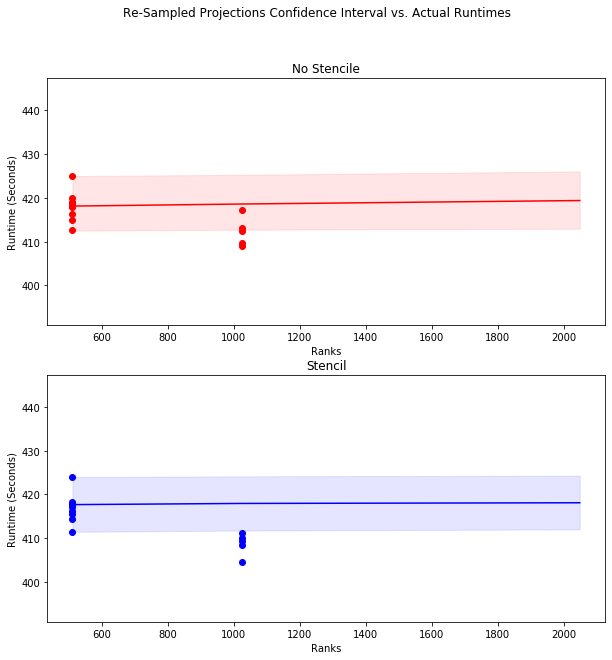

In [5]:
baseranks = 512
kvals = np.array([1, 2, 4])
iterations = 50

MILLION = 1000000
yMin = 0
yMax = 0
count = 0

fig, axs = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle('Re-Sampled Projections Confidence Interval vs. Actual Runtimes')

count = 0
labels = ['NoStencil', 'Stencil']

for df in [df_Attaway_DGemm_512_NoStencil, df_Attaway_DGemm_512_Stencil]:    
    print(labels[count])
    
    lowerBound = []
    median = []
    upperBound = []
    for k in kvals:   
        expList = []
        for run in range(0, len(df)):
            currentRun = df.iloc[run]
            eid = currentRun['Experiment']
            rid = currentRun['expid']
            currentPath = './mlruns/' + str(eid) + '/' + str(rid) + '/artifacts/bsp-trace.json'
            currentData = analysis.getData(currentPath)
            currentData = currentData[currentData['rank'] == 0]
            
            for i in range(iterations):
                data = analysis.resample_project(currentData, len(currentData), k, col='interval_max_usec')
                projectedRunTime = sum(data) / MILLION
                expList.append(projectedRunTime)
            expList.sort()
        
        lowerBound.append(expList[0])
        median.append(expList[int(len(expList) / 2)])
        upperBound.append(expList[-1])
    
    if count == 0:
        _ = axs[0].plot(baseranks * kvals, median, color='red')
        _ = axs[0].fill_between(baseranks * kvals, lowerBound, upperBound, color='red', alpha=.1)
    if count == 1:
        _ = axs[1].plot(baseranks * kvals, median, color='blue')
        _ = axs[1].fill_between(baseranks * kvals, lowerBound, upperBound, color='blue', alpha=.1)
    
    
    if count == 0:
        yMin = min(lowerBound)
        yMax = max(upperBound)
    else:
        if yMin > min(lowerBound):
            yMin = min(lowerBound)
        if yMax < max(upperBound):
            yMax = max(upperBound)
            
    count = count + 1

for run in range(0, len(attawayData)):
    label = ''
    workload = attawayData['Workload'][run]
    ranks = attawayData['Ranks'][run]
    stencil = attawayData['Stencil'][run]

    currentRunTime = attawayData['RunTime'][run]
   
    if int(stencil) > 0:
        label = label + 'Stencil'
        
    if label == '':
        if (workload == 'dgemm'):
            axs[0].plot(int(ranks), currentRunTime, 'o', color='red')

    if label == 'Stencil':
        if (workload == 'dgemm'):
            axs[1].plot(int(ranks), currentRunTime, 'o', color='blue')

_ = axs[0].set_ylim([0.95 * yMin, 1.05 * yMax])
_ = axs[0].set_title('No Stencile')
_ = axs[0].set_xlabel('Ranks')
_ = axs[0].set_ylabel('Runtime (Seconds)')

_ = axs[1].set_ylim([0.95 * yMin, 1.05 * yMax])
_ = axs[1].set_title('Stencil')
_ = axs[1].set_xlabel('Ranks')
_ = axs[1].set_ylabel('Runtime (Seconds)')